In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Using Sklearn to Train Decision Trees

**Using Raw Accelerometer Data**

In [5]:
# Importing data from MakeDataset.py
from MakeDataset import X_train, X_test, y_train, y_test

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [6]:
# Shape of original data from MakeDataset.py
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (126, 500, 3)
X_test shape: (54, 500, 3)
y_train shape: (126,)
y_test shape: (54,)


In [7]:
# Flatten X_train and X_test into 2D data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# New data shape
print(f"X_train_flat shape: {X_train_flat.shape}")
print(f"X_test_flat shape: {X_test_flat.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_flat shape: (126, 1500)
X_test_flat shape: (54, 1500)
y_train shape: (126,)
y_test shape: (54,)


In [8]:
# Training decision tree using sklearn
model_1 = DecisionTreeClassifier(random_state=42)
model_1.fit(X_train_flat, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Getting predictions on test data
y_pred = model_1.predict(X_test_flat)

In [10]:
# Calculate required metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")

Accuracy: 0.61
Precision: 0.56
Recall: 0.61


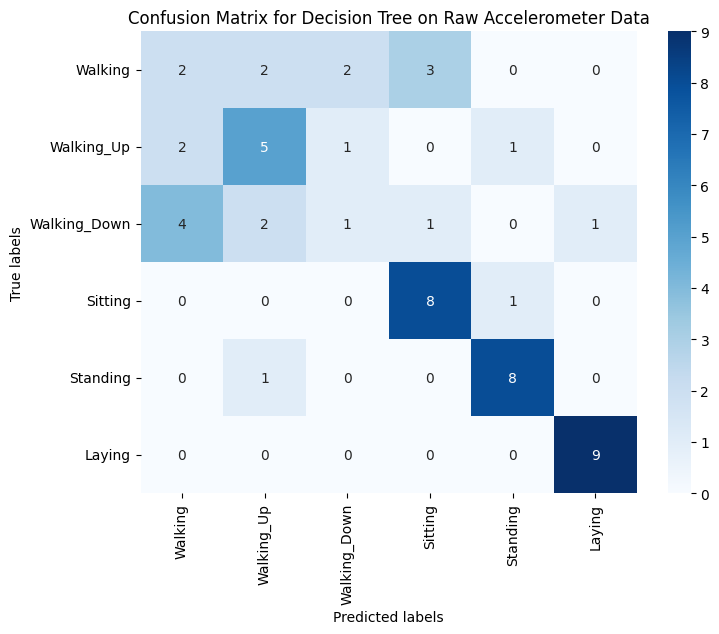

In [9]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
            xticklabels=["Walking","Walking_Up","Walking_Down","Sitting","Standing","Laying"],
            yticklabels=["Walking","Walking_Up","Walking_Down","Sitting","Standing","Laying"])
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Decision Tree on Raw Accelerometer Data")
plt.show()

**Using TSFEL Data**

**Using Features Provided in Dataset**

In [ ]:
# Get training and test data
X_train_provided = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train_provided = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None).values.ravel()

X_test_provided = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
y_test_provided = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None).values.ravel()

# Check shape
print("X_train_provided shape:", X_train_provided.shape)
print("y_train_provided shape:", y_train_provided.shape)
print("X_test_provided shape:", X_test_provided.shape)
print("y_test_provided shape:", y_test_provided.shape)

X_train_provided shape: (7352, 561)
y_train_provided shape: (7352,)
X_test_provided shape: (2947, 561)
y_test_provided shape: (2947,)


In [16]:
# Train decision tree
model_2 = DecisionTreeClassifier(random_state=42)
model_2.fit(X_train_provided, y_train_provided)

DecisionTreeClassifier(random_state=42)

In [18]:
# Getting predictions on test data
y_pred_provided = model.predict(X_test_provided)

In [21]:
# Calculate required metrics
acc_provided = accuracy_score(y_test_provided, y_pred_provided)
prec_provided = precision_score(y_test_provided, y_pred_provided, average='weighted')
rec_provided = recall_score(y_test_provided, y_pred_provided, average='weighted')

print(f"Accuracy: {acc_provided:.2f}")
print(f"Precision: {prec_provided:.2f}")
print(f"Recall: {rec_provided:.2f}")

Accuracy: 0.86
Precision: 0.86
Recall: 0.86


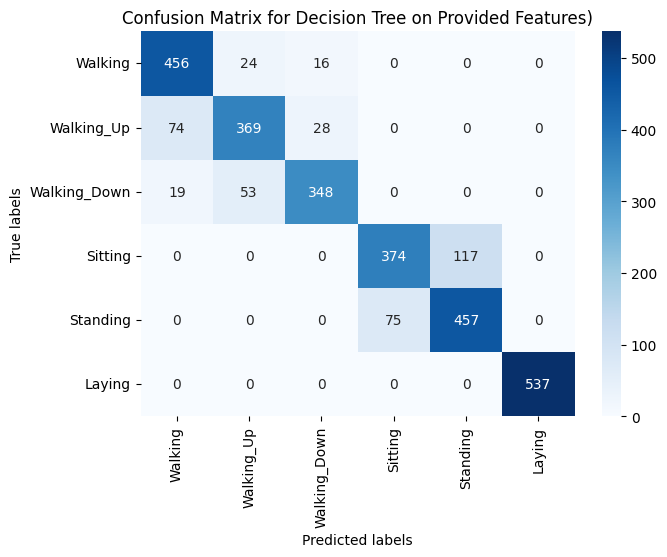

In [23]:
# Confusion matrix
cm = confusion_matrix(y_test_provided, y_pred_provided)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Walking","Walking_Up","Walking_Down","Sitting","Standing","Laying"],
            yticklabels=["Walking","Walking_Up","Walking_Down","Sitting","Standing","Laying"])
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Decision Tree on Provided Features)")
plt.show()

# Varying the Depths of Decision Trees

**Using Raw Accelerometer Data**

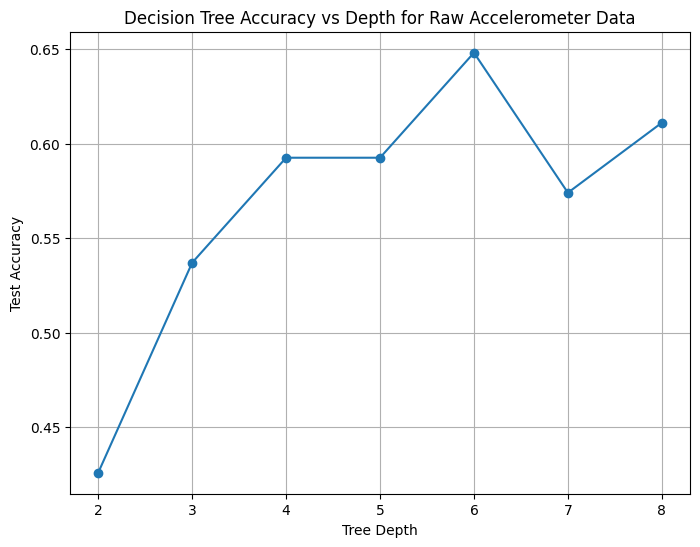

In [ ]:
accuracies = []

# Train decision trees for varying depths and record accuracies
for depth in range(2,9):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_flat, y_train)
    y_pred = model.predict(X_test_flat)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot test accuracy vs depth
plt.figure(figsize=(8,6))
plt.plot(range(2,9), accuracies, marker="o")
plt.title("Decision Tree Accuracy vs Depth for Raw Accelerometer Data")
plt.xlabel("Tree Depth")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

**Using TSFEL Data**

**Using Features Provided in Dataset**

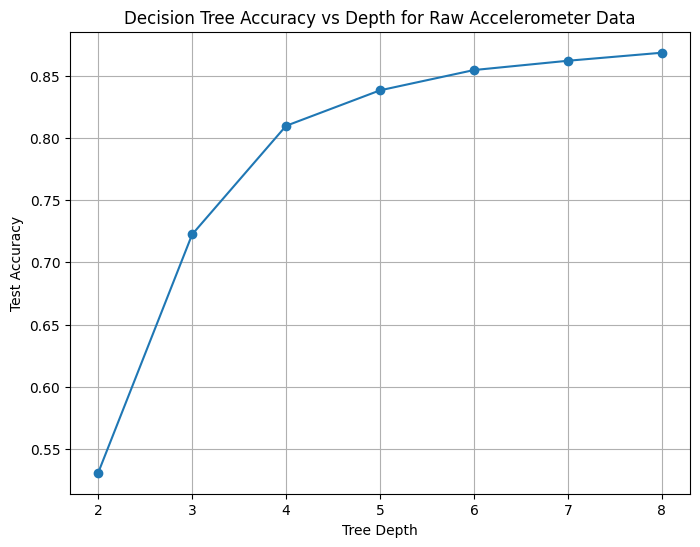

In [41]:
accuracies = []

# Train decision trees for varying depths and record accuracies
for depth in range(2,9):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_provided, y_train_provided)
    y_pred_pr = model.predict(X_test_provided)
    acc = accuracy_score(y_test_provided, y_pred_pr)
    accuracies.append(acc)

# Plot test accuracy vs depth
plt.figure(figsize=(8,6))
plt.plot(range(2,9), accuracies, marker="o")
plt.title("Decision Tree Accuracy vs Depth for Raw Accelerometer Data")
plt.xlabel("Tree Depth")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()